## TBEC 2018 (Turkish Building Earthquake Code) Based Record Selection
Created on: 26/08/2021

Author: Volkan Ozsarac

Affiliation: University School for Advanced Studies IUSS Pavia

Earthquake Engineering PhD Candidate

email:  volkan.ozsarac@iusspavia.it

In [1]:
from EzGM.selection import tbec_2018
from time import time

In [2]:
# Acquire the run start time
start_time = time()

### 1) Initialize the tbec_2018 object for record selection

In [3]:
spec = tbec_2018(database='NGA_W2', outdir='Outputs')

## 2) Select the ground motions

Ground motion selection is finished scaling factor is 1.070


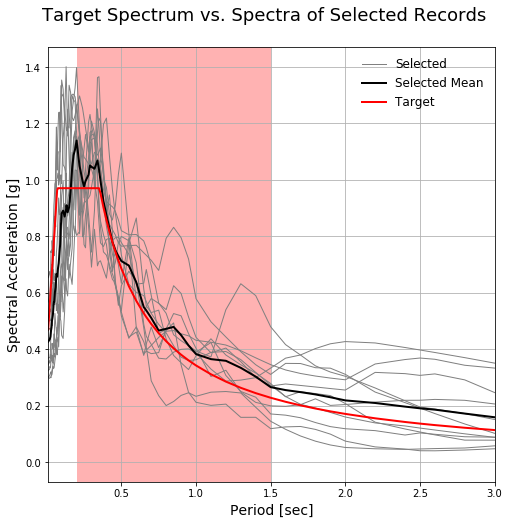

In [4]:
spec.select(Lat=41.0582, Long=29.00951, DD=2, Soil='ZC', nGM=11, selection=1, Tp=1,
            Mw_lim=[6.5, 8], Vs30_lim=[200, 700], Rjb_lim=[0, 20], fault_lim=None, opt=0, 
            maxScale=2)

# selected records can be plotted at this stage
spec.plot(save=1, show=1)

### 4) If database == 'NGA_W2' you can first download the records via nga_download method from NGA-West2 Database [http://ngawest2.berkeley.edu/] and then use write method. If you already have record database elsewhere you can ignore and comment this part

In [5]:
# You should enter correct credentials to download the records
spec.ngaw2_download(username = 'example_username@email.com', pwd = 'example_password123456', sleeptime = 3, browser = 'firefox')


Started executing ngaw2_download method...
Getting the webdriver to use...


2335kb [00:00, 28852.10kb/s]            


Webdriver is obtained successfully.
Signing in with credentials...
Signed in successfully.
Listing the Records...
Search was successfully created. Please allow time to render the graphics.
You are downloading the UNSCALED, PROCESSED, AS-RECORDED (unrotated) displacement, velocity and acceleration trace files. The scale factors determined using the on-line tool are given in the csv file accompanying the trace files! The users of the PEER-NGA databases, flatfiles, models and reports are requested to acknowledge the Pacific Earthquake Engineering Research Center (PEER) in their work and publications.
Please allow a few seconds of apparent inactivity for the download to complete. The wait time depends on the number of records being downloaded and the network speed. Wait until your browser indicates that it has completed the download!
Finishing in 4 ...
Finishing in 3 ...
Finishing in 2 ...
Finishing in 1 ...
Finishing in 0 ...
Downloaded files are located in
/home/jovyan/Examples/binder/Ou

### 5) If you have records already inside recs_f\database.zip\database or downloaded records for database = NGA_W2 case, write whatever you want, the object itself, selected and scaled time histories

In [6]:
spec.write(obj=1, recs=1, recs_f='')

Finished writing process, the files are located in
/home/jovyan/Examples/binder/Outputs


In [7]:
# Calculate the total time passed
spec.run_time(start_time)

Run time: 0 hours: 1 minutes: 20.57 seconds
